In [42]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import ipywidgets as widgets  # interactive display

In [14]:
x1 = np.random.normal(3, 1, 1000)
x2 = x1 + np.random.normal(3, 0.5, 1000)

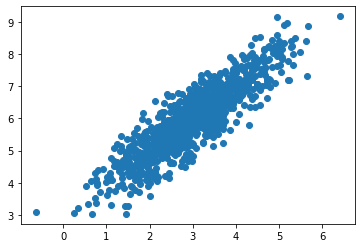

In [15]:
plt.scatter(x1,x2)

In [18]:
def cov_matrix(x1,x2):
    corr_coef = pearsonr(x1,x2)[0]
    cov = corr_coef * np.sqrt(np.var(x1) * np.var(x2))
    cov_matrix = np.array([[np.var(x1), cov], [cov, np.var(x2)]])
    return cov_matrix

# or simply using np.cov() function as an alternative

In [28]:
X[:,0] = x1
X[:,1] = x2

In [36]:
W

array([[ 0.31622777, -0.9486833 ],
       [ 0.9486833 ,  0.31622777]])

In [37]:
def change_of_basis(X,W):
    Y = X @ W
    return Y

In [38]:
Y = change_of_basis(X,W)

In [51]:
def refresh(theta=0):
    u = [1, np.tan(theta * np.pi / 180)]
    W = define_orthonormal_basis(u)
    Y = change_of_basis(X, W)
    plt.scatter(Y[:,0], Y[:,1])
    plt.title("Correlation: {}".format(round(pearsonr(Y[:,0], Y[:,1])[0],2)))

_ = widgets.interact(refresh, theta=(0, 90, 5))

interactive(children=(IntSlider(value=0, description='theta', max=90, step=5), Output()), _dom_classes=('widge…

In [52]:
def cov_mat(X):
    X = X - np.mean(X, axis=0)
    cov_mat = np.matmul(X.T, X) / len(X)
    return cov_mat

In [73]:
def sorting(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    return evals, evectors

In [84]:
def pca(X):
    cov_matrix = cov_mat(X)
    evals, evectors = np.linalg.eigh(cov_matrix)
    evals, evectors = sorting(evals, evectors)
    score = change_of_basis(X, evectors)
    return score, evals, evectors

In [85]:
score, evals, evectors = pca(X)

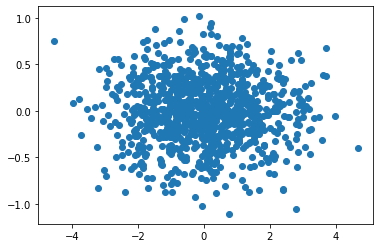

In [86]:
plt.scatter(score[:,0],score[:,1])

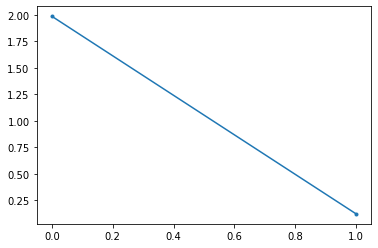

In [87]:
plt.plot(evals, '.-')